## Week 3 Coding Tasks

This week, you will build off of your work from last week.
1. First, (if you haven't done so already), create a new column indicating the SHADAC classification for each Tennessee county. You can use the following code to accomplish this:
```
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')

physicians = physicians[physicians['state'] == 'Tennessee']

population = pd.read_csv('../data/population_by_county.csv')

physicians = pd.merge(left = physicians[['FIPS', 'county', 'primary_care_physicians']],
        right = population[['FIPS', 'population', 'urban']])

physicians['residents_per_pcp'] = physicians['population'] / physicians['primary_care_physicians']

In [3]:
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
       (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

In [4]:
physicians

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
1,47003,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate
2,47005,Benton,3.0,16140,Rural,5380.000000,low inadequate
3,47007,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate
4,47009,Blount,90.0,129927,Urban,1443.633333,adequate
...,...,...,...,...,...,...,...
90,47181,Wayne,5.0,16693,Rural,3338.600000,moderately inadequate
91,47183,Weakley,18.0,33510,Rural,1861.666667,moderately inadequate
92,47185,White,9.0,26800,Rural,2977.777778,moderately inadequate
93,47187,Williamson,338.0,225389,Urban,666.831361,adequate


2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.

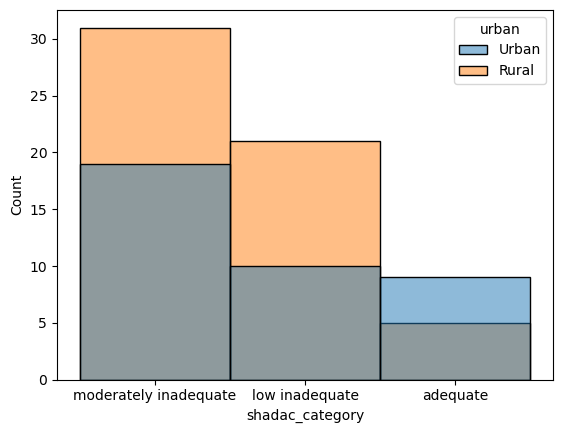

In [6]:
sns.histplot(data = physicians, x = 'shadac_category', hue = 'urban');

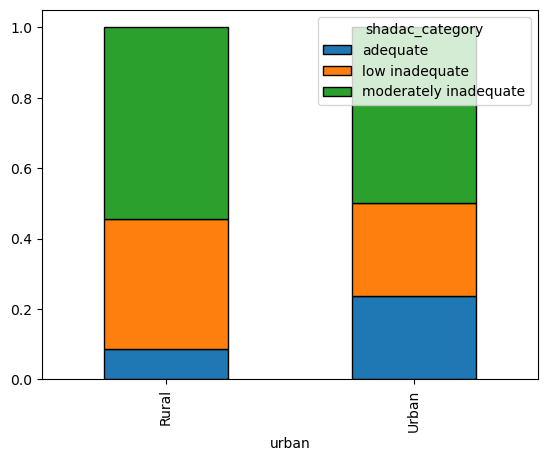

In [11]:
pd.crosstab(physicians['urban'],
            physicians['shadac_category'],
           normalize = 'index').plot(kind = 'bar', stacked = True, edgecolor = 'black');

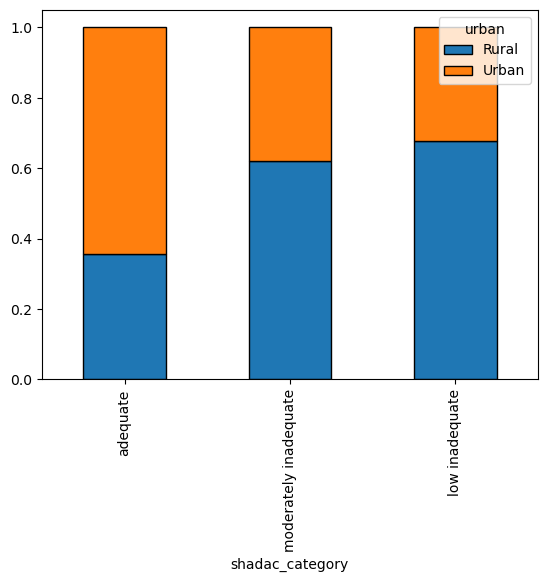

In [23]:
(
    pd.crosstab(physicians['shadac_category'],
                physicians['urban'],
                normalize = 'index')
    .loc[['adequate', 'moderately inadequate', 'low inadequate']]
    .plot(kind = 'bar', stacked = True, edgecolor = 'black')
);

3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.

In [24]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')
unemployment.head(2)

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2


In [25]:
physicians.head(2)

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
1,47003,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate


In [30]:
unemployment['FIPS'] = unemployment['laus_code'].str[2:7].astype(int)

In [38]:
unemployment.head(2)

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate,FIPS
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9,47001
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2,47003


In [39]:
physicians.head(2)

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
1,47003,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate


In [42]:
physicians = pd.merge(
    left = physicians,
    right = unemployment[['unemployment_rate', 'FIPS']]
)

4. How do unemployment rates compare for urban counties versus rural counties?

In [44]:
physicians.loc[physicians['urban'] == 'Urban']['unemployment_rate'].describe()

count    38.000000
mean      4.918421
std       0.759749
min       3.300000
25%       4.325000
50%       4.850000
75%       5.375000
max       7.100000
Name: unemployment_rate, dtype: float64

In [45]:
physicians.loc[physicians['urban'] == 'Rural']['unemployment_rate'].describe()

count    57.000000
mean      5.850877
std       0.976349
min       3.700000
25%       5.200000
50%       5.600000
75%       6.500000
max       9.300000
Name: unemployment_rate, dtype: float64

In [46]:
physicians.groupby('urban')['unemployment_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
urban,,,,,,,,
Rural,57.0,5.850877,0.976349,3.7,5.200,5.60,6.500,9.3
Urban,38.0,4.918421,0.759749,3.3,4.325,4.85,5.375,7.1


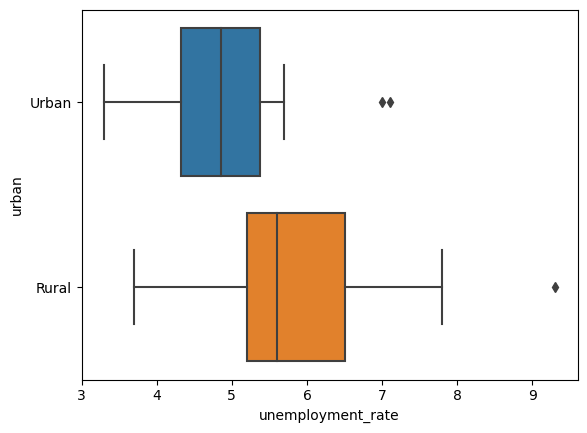

In [48]:
sns.boxplot(data = physicians, x = 'unemployment_rate', y = 'urban');

In [50]:
physicians[physicians['urban'] == 'Urban'].sort_values('unemployment_rate')

,FIPS,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,unemployment_rate
93,47187,Williamson,338.0,225389,Urban,666.831361,adequate,3.3
94,47189,Wilson,43.0,136666,Urban,3178.279070,moderately inadequate,4.0
73,47147,Robertson,26.0,70280,Urban,2703.076923,moderately inadequate,4.1
74,47149,Rutherford,137.0,315815,Urban,2305.218978,moderately inadequate,4.1
10,47021,Cheatham,23.0,40181,Urban,1747.000000,moderately inadequate,4.1
46,47093,Knox,520.0,461104,Urban,886.738462,adequate,4.1
11,47023,Chester,4.0,17190,Urban,4297.500000,low inadequate,4.3
82,47165,Sumner,91.0,183437,Urban,2015.791209,moderately inadequate,4.3
40,47081,Hickman,5.0,24813,Urban,4962.600000,low inadequate,4.3
21,47043,Dickson,19.0,52680,Urban,2772.631579,moderately inadequate,4.3


5. Create a new column, `pcp_per_100k` which contains the number of primary care physicians per 100,000 residents. Investigate the relationship between this new measure and the unemployment rate per county. What do you find?

In [52]:
physicians['pcp_per_100k'] = physicians['primary_care_physicians'] / physicians['population'] * 100000

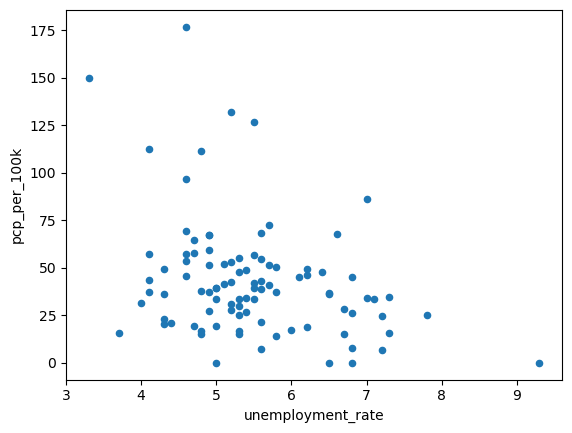

In [56]:
physicians.plot(kind = 'scatter',
               x = 'unemployment_rate',
               y = 'pcp_per_100k');

In [57]:
physicians[['unemployment_rate', 'pcp_per_100k']].corr()

,unemployment_rate,pcp_per_100k
unemployment_rate,1.000000,-0.335333
pcp_per_100k,-0.335333,1.000000


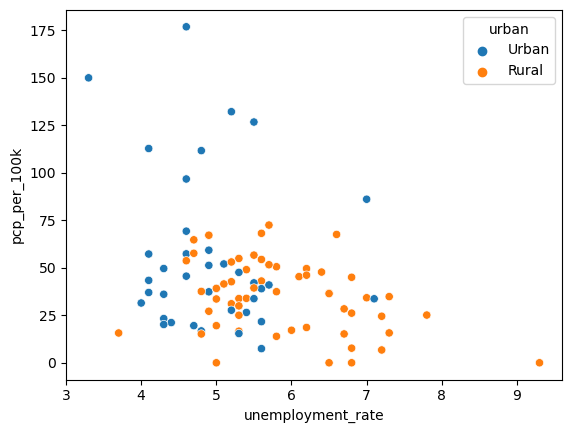

In [61]:
sns.scatterplot(data = physicians,
               x = 'unemployment_rate',
               y = 'pcp_per_100k',
               hue = 'urban');